Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные до 2016 года, они могут быть неполными. 

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Исходные данные

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Методом `info()` определили типы столбцов и наличие пропущенных значений. В данных имеются пропуски – нужно их изучить и по возможности заполнить. 

В столбцах типа `object` присутствуют значения разных регистров, как и в названии столбцов. Для удобства и исключения дубликатов, нужно привести к нижнему регистру, проверить уникальные значения в столбцах типа `object`, удалить явные дубликаты. 


### Подготовка данных

#### замена названий столбцов

In [4]:
df.columns = [x.lower() for x in df.columns] #приведение к нижнему регистру названия столбцов

In [5]:
for col in df.columns: 
    if df[col].dtype == 'O': 
        df[col] = df[col].str.lower() #приведение к нижнему регистру строк, которые имеют тип object

Посмотрим зависимость между пустыми значениями. Выведем таблицы, где есть столбцы с пустыми значениями, уникальные значения и их количество.   

In [6]:
for col in df.columns:
    if df[col].isna().sum() > 0: 
        print ('Пустые значения в столбце', col)
        display (df[df[col].isna()].shape) 
        display (df[df[col].isna()].head()) 
        for col_2 in df.columns: 
            #каких значений больше всего, если столбец имеет значение Nan  
            display (df[df[col].isna()][col_2].value_counts().head())      

Пустые значения в столбце name


(2, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Series([], Name: name, dtype: int64)

gen    2
Name: platform, dtype: int64

1993.0    2
Name: year_of_release, dtype: int64

Series([], Name: genre, dtype: int64)

0.00    1
1.78    1
Name: na_sales, dtype: int64

0.00    1
0.53    1
Name: eu_sales, dtype: int64

0.00    1
0.03    1
Name: jp_sales, dtype: int64

0.00    1
0.08    1
Name: other_sales, dtype: int64

Series([], Name: critic_score, dtype: int64)

Series([], Name: user_score, dtype: int64)

Series([], Name: rating, dtype: int64)

Пустые значения в столбце year_of_release


(269, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


lego harry potter: years 5-7         7
rock band                            4
happy feet two                       4
bejeweled 3                          3
wrc: fia world rally championship    3
Name: name, dtype: int64

wii     34
ps2     34
ds      30
x360    30
ps3     25
Name: platform, dtype: int64

Series([], Name: year_of_release, dtype: int64)

action     62
sports     42
misc       29
shooter    27
racing     23
Name: genre, dtype: int64

0.00    58
0.01    15
0.02    14
0.06    12
0.09    10
Name: na_sales, dtype: int64

0.00    103
0.01     27
0.02     18
0.03     15
0.06     11
Name: eu_sales, dtype: int64

0.00    213
0.01      9
0.02      8
0.04      6
0.03      5
Name: jp_sales, dtype: int64

0.00    108
0.01     66
0.02     22
0.03     16
0.04     13
Name: other_sales, dtype: int64

69.0    10
54.0     7
76.0     7
77.0     7
78.0     7
Name: critic_score, dtype: int64

tbd    48
8.1     7
8.8     7
7.6     7
8.5     6
Name: user_score, dtype: int64

e       69
t       56
m       27
e10+    27
rp       2
Name: rating, dtype: int64

Пустые значения в столбце genre


(2, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Series([], Name: name, dtype: int64)

gen    2
Name: platform, dtype: int64

1993.0    2
Name: year_of_release, dtype: int64

Series([], Name: genre, dtype: int64)

0.00    1
1.78    1
Name: na_sales, dtype: int64

0.00    1
0.53    1
Name: eu_sales, dtype: int64

0.00    1
0.03    1
Name: jp_sales, dtype: int64

0.00    1
0.08    1
Name: other_sales, dtype: int64

Series([], Name: critic_score, dtype: int64)

Series([], Name: user_score, dtype: int64)

Series([], Name: rating, dtype: int64)

Пустые значения в столбце critic_score


(8578, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


the amazing spider-man 2 (2014)               7
fifa 12                                       7
sonic & all-stars racing transformed          6
adventure time: finn & jake investigations    6
avatar: the game                              6
Name: name, dtype: int64

ds     1434
ps      997
ps2     863
psp     747
wii     735
Name: platform, dtype: int64

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
Name: year_of_release, dtype: int64

action          1479
misc            1227
sports          1154
adventure        980
role-playing     761
Name: genre, dtype: int64

0.00    3877
0.02     279
0.01     252
0.03     251
0.04     242
Name: na_sales, dtype: int64

0.00    4578
0.01     611
0.02     523
0.03     359
0.04     273
Name: eu_sales, dtype: int64

0.00    4471
0.02     523
0.03     382
0.01     374
0.04     268
Name: jp_sales, dtype: int64

0.00    4777
0.01    1565
0.02     654
0.03     365
0.04     250
Name: other_sales, dtype: int64

Series([], Name: critic_score, dtype: int64)

tbd    1342
7.8      26
7        24
8        23
7.6      19
Name: user_score, dtype: int64

e       1182
t        321
e10+     302
m         80
ec         8
Name: rating, dtype: int64

Пустые значения в столбце user_score


(6701, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


fifa 12                                                               7
the amazing spider-man 2 (2014)                                       7
transformers: revenge of the fallen (xbox 360, ps3, & pc versions)    6
sonic & all-stars racing transformed                                  6
cars 2                                                                6
Name: name, dtype: int64

ps     990
ds     879
ps2    680
psp    665
ps3    367
Name: platform, dtype: int64

2010.0    457
2008.0    440
2011.0    418
2009.0    407
2007.0    376
Name: year_of_release, dtype: int64

action          1163
misc             862
adventure        844
sports           832
role-playing     725
Name: genre, dtype: int64

0.00    3692
0.02     171
0.03     151
0.01     151
0.04     147
Name: na_sales, dtype: int64

0.00    3731
0.01     413
0.02     370
0.03     255
0.04     208
Name: eu_sales, dtype: int64

0.00    2701
0.02     509
0.03     371
0.01     346
0.04     262
Name: jp_sales, dtype: int64

0.00    4189
0.01     956
0.02     433
0.03     241
0.04     170
Name: other_sales, dtype: int64

68.0    4
88.0    3
66.0    3
57.0    2
65.0    2
Name: critic_score, dtype: int64

Series([], Name: user_score, dtype: int64)

e       40
t       20
e10+     7
m        3
rp       1
Name: rating, dtype: int64

Пустые значения в столбце rating


(6766, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


the amazing spider-man 2 (2014)                                       7
fifa 12                                                               7
adventure time: finn & jake investigations                            6
avatar: the game                                                      6
transformers: revenge of the fallen (xbox 360, ps3, & pc versions)    6
Name: name, dtype: int64

ps     989
ds     878
ps2    680
psp    665
ps3    379
Name: platform, dtype: int64

2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
Name: year_of_release, dtype: int64

action          1181
misc             868
adventure        857
sports           839
role-playing     721
Name: genre, dtype: int64

0.00    3732
0.02     173
0.01     152
0.03     151
0.04     146
Name: na_sales, dtype: int64

0.00    3737
0.01     426
0.02     378
0.03     266
0.04     209
Name: eu_sales, dtype: int64

0.00    2768
0.02     508
0.03     371
0.01     348
0.04     262
Name: jp_sales, dtype: int64

0.00    4214
0.01     970
0.02     447
0.03     245
0.04     174
Name: other_sales, dtype: int64

66.0    5
62.0    5
80.0    4
75.0    4
65.0    4
Name: critic_score, dtype: int64

tbd    50
8.3     7
7.5     5
8       4
8.2     4
Name: user_score, dtype: int64

Series([], Name: rating, dtype: int64)

#### обработка пропусков

In [7]:
for col in ['name', 'genre']: 
    df[col] = df[col].fillna('unknown')

In [8]:
df_orignal = df.copy()

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) 

In [10]:
print ('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


Пропущенные значения в столбцах `name` и `genre` заменим значением `unknown`. Пропущенных значений в этих столбцах мало, поэтому можно было их удалить методом dropna. 

Значения `tbd` в столбце `user_score` заменили на Nan, чтобы можно было анализировать данный столбец, а для этого его надо привести к числовому типу. 

Пропущенные значения в столбцах `critic_score`, `user_score`, `rating` пробовали заменить значениями, соответствующие имени игры. Но это изменило в будущем статистические характеристики, поэтому было принято решение не заменять пустые значения таким методом, так как рейтинг игры может зависеть также от платформы.    

В столбце `year_of_release` пустые значения пробовали заменять максимальным значением по имени игры, но игры могли выходить в разные годы на разных платформах.

Количество значений, которые удалось заменить методами выше, было небольшим.

Природу пропущенных значений не удалось обнаружить. Пустые значения присутствуют в разные года, на разных платформах.  

In [11]:
# critic = df.pivot_table(index = 'name', values = 'critic_score', aggfunc='first')
# critic = critic.reset_index()
# df = df.merge (critic, on = 'name', how = 'left', suffixes=('_до', ''))

In [12]:
# score = df.pivot_table(index = 'name', values = 'user_score', aggfunc='first')
# score = score.reset_index()
# df = df.merge (score, on = 'name', how = 'left', suffixes=('_до', ''))

In [13]:
# rating_1 = df.pivot_table(index = 'name', values = 'rating', aggfunc='first')
# rating_1 = rating_1.reset_index()
# df = df.merge (rating_1, on = 'name', how = 'left', suffixes=('_до', ''))

In [14]:
# for uniq in df[df['year_of_release'].isna()]['name'].unique():
#     display (df[df['name'] == uniq])
# df = df.fillna({'year_of_release':df.groupby('name')['year_of_release'].transform('max')})

In [15]:
# display (df[df['critic_score'].isna()]) #8578 
# display (df[df['user_score'].isna()]) #6701 
# display (df[df['rating'].isna()]) #6766
# display (df[(df['critic_score'].isna())&(df['user_score'].isna())&(df['rating'].isna())]) #6621 

# display (df[(df['critic_score'].isna())&(df['user_score'].isna())&(df['rating'].isna())&(df['year_of_release'] > 2010)])#1617 
# #1/4 отсутсвующих оценок приходяится на страше 2010 года 
# # оценки точно не троагем - только вот от чего зависят 

#### преобразование типов данных

In [16]:
df = df.astype ({
                'year_of_release':'Int64', #чтобы работать с пропущенными данными 
                'critic_score':'Int64', 
                'user_score': 'float'
                })

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


#### Суммарные продажи по всем регионам

In [18]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных 

### Гистограммы распределения

Построим гистограммы для числовых столбцов таблицы. 

no numeric
no numeric
no numeric
no numeric


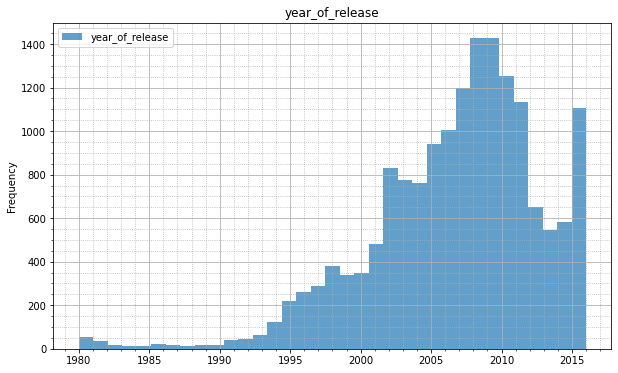

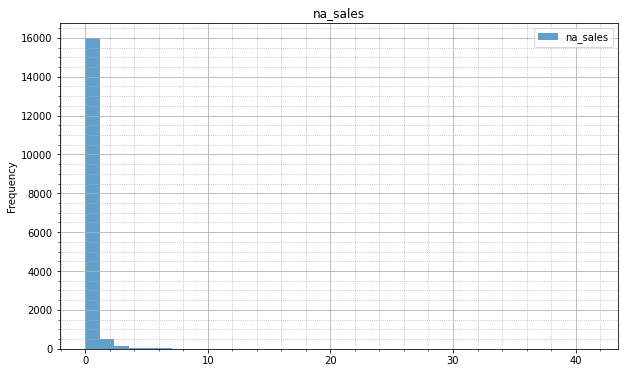

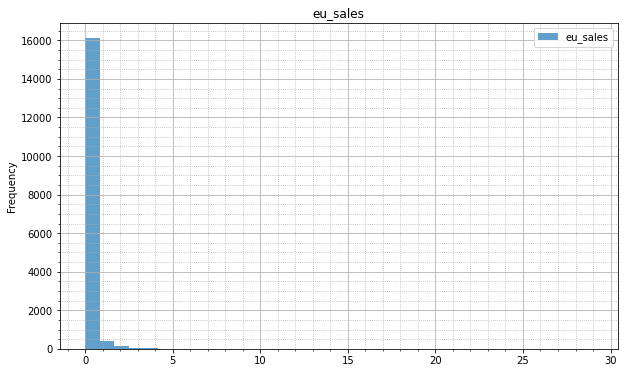

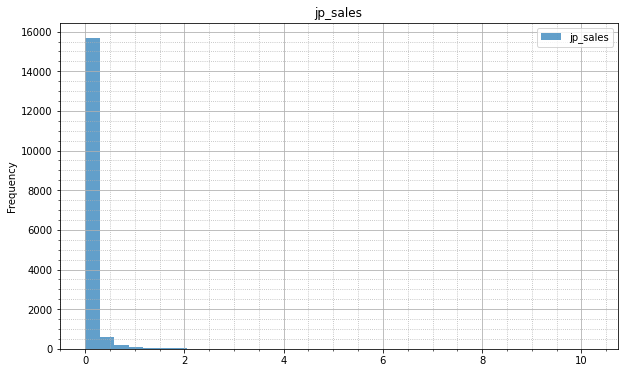

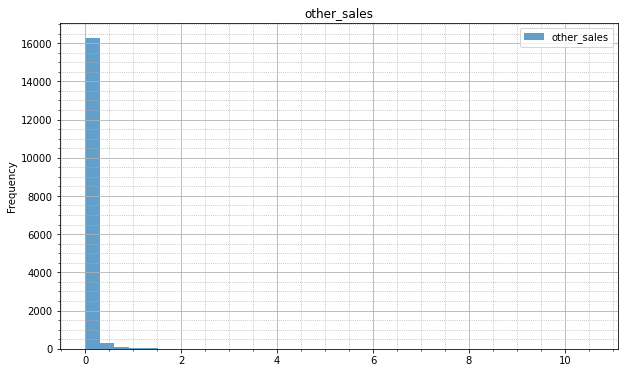

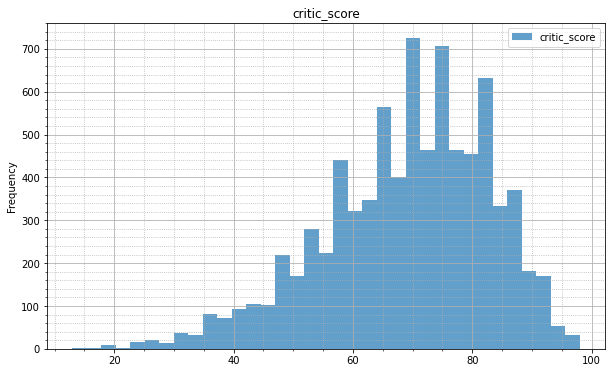

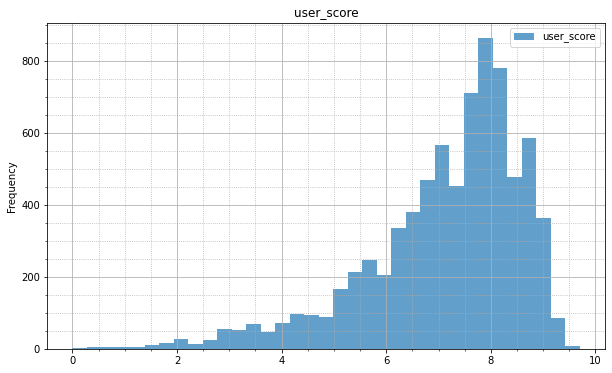

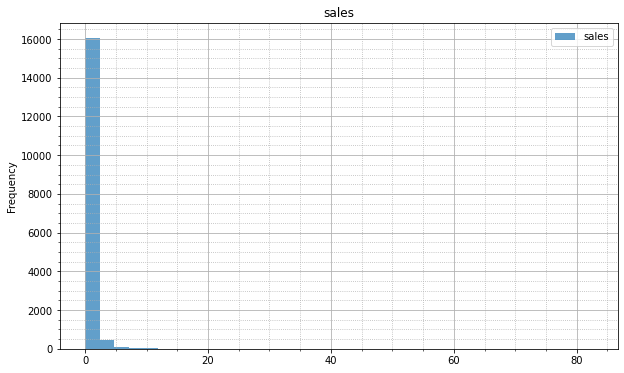

In [19]:
for col in df.columns: 
    try: 
        df.plot(kind ='hist', y = col, 
        bins=35, label=col, figsize=(10,6), alpha = 0.7, #xlim = (0,10),
        title = col)
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', linestyle=':')
        #title = 'Расход {} для тарифов smart и ultra'.format(321))
    except: print ('no numeric')

На диаграмме распределения по годам видно, что с 2007 - 2010 года был наибольший пик выпуска компьютерных игр. 

Диаграммы для продаж по регионам получились не информативны. 

Оценки пользователей и критиков распределены нормально со смещением вправо.  

In [20]:
list_sale = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']    

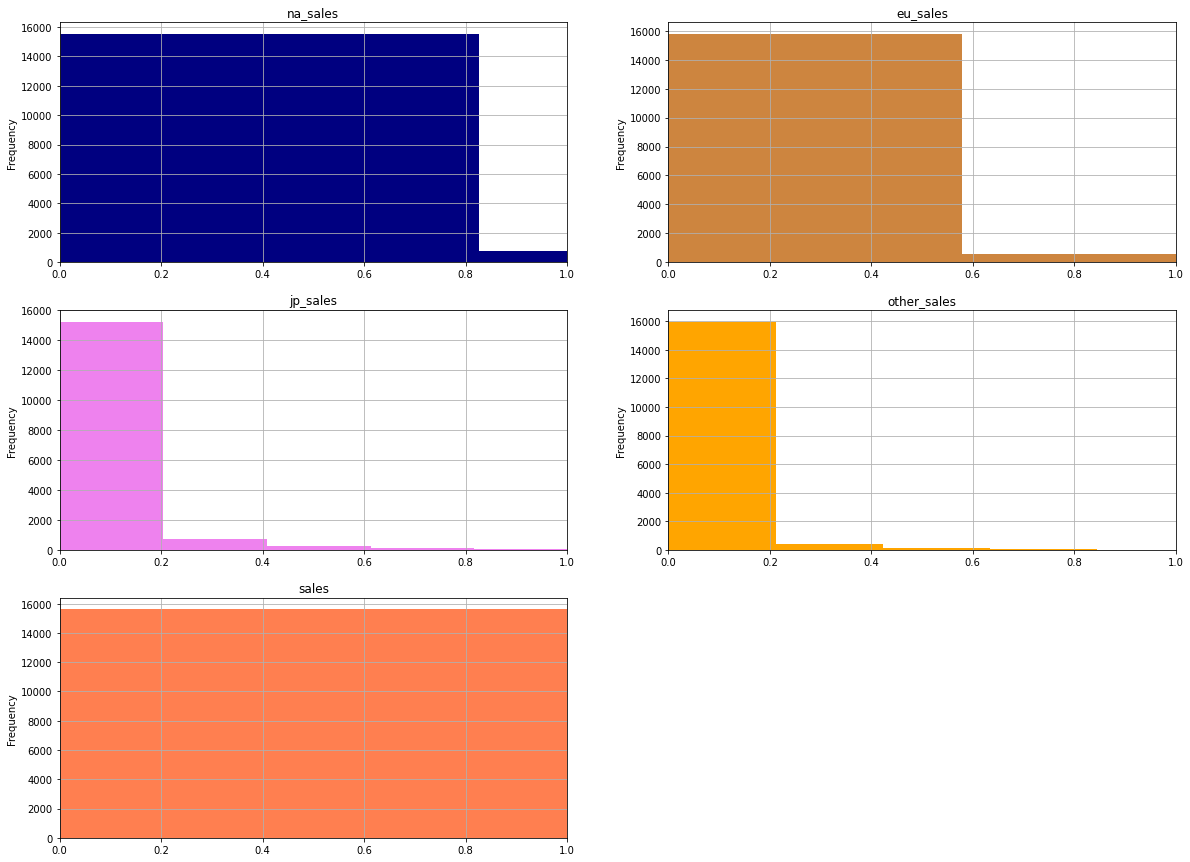

In [21]:
fig = plt.figure(figsize=(20, 15))

for sale in list_sale:
    color = ['navy', 'peru', 'violet', 'orange', 'coral']
    ax = fig.add_subplot (3, 2, list_sale.index(sale)+1)
    ax = df[sale].plot (kind = 'hist', bins = 50, grid = True, title = sale, xlim = (0,1),
                        color = color[list_sale.index(sale)])

На данных диаграммах можно сделать вывод, что продажи в Америке и Европе похожи и больше, чем в Японии и других странах. 

In [22]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Данные по продажам сильно разбросаны. Это может быть связано с очень популярными играми, которые сильно выбились по продажам. 

### Количество игр по годам

<AxesSubplot:xlabel='year_of_release'>

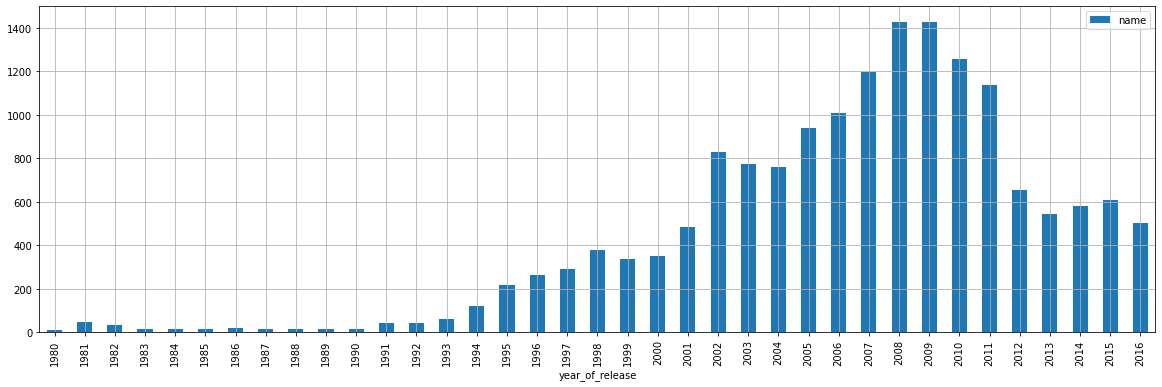

In [23]:
(df.pivot_table (index = 'year_of_release', values = 'name', aggfunc='count')
.plot(kind = 'bar', figsize=(20,6), grid = True))

In [24]:
# for year in df['year_of_release'].sort_values().unique(): 
#     print (year, len (df[df['year_of_release'] == year]['platform'].unique()))

2008 - 2009 года - период, когда выпуск игр достиг своего пика. После 2009 года идет спад - это может быть связано с развитием игр для мобильных телефонов. До 2008 года шел, наоборот, рост – развитие компьютерных игр. Данные за все периоды нам не важны, в период с 2012 по 2015 год (за 2016 год у нас не полные данные) рынок стабилизировался, и не было заметных ростов и падений выпуска игр. Этот период и стоит взять в качестве *актуального периода*. 

### Изменение продаж по платформам

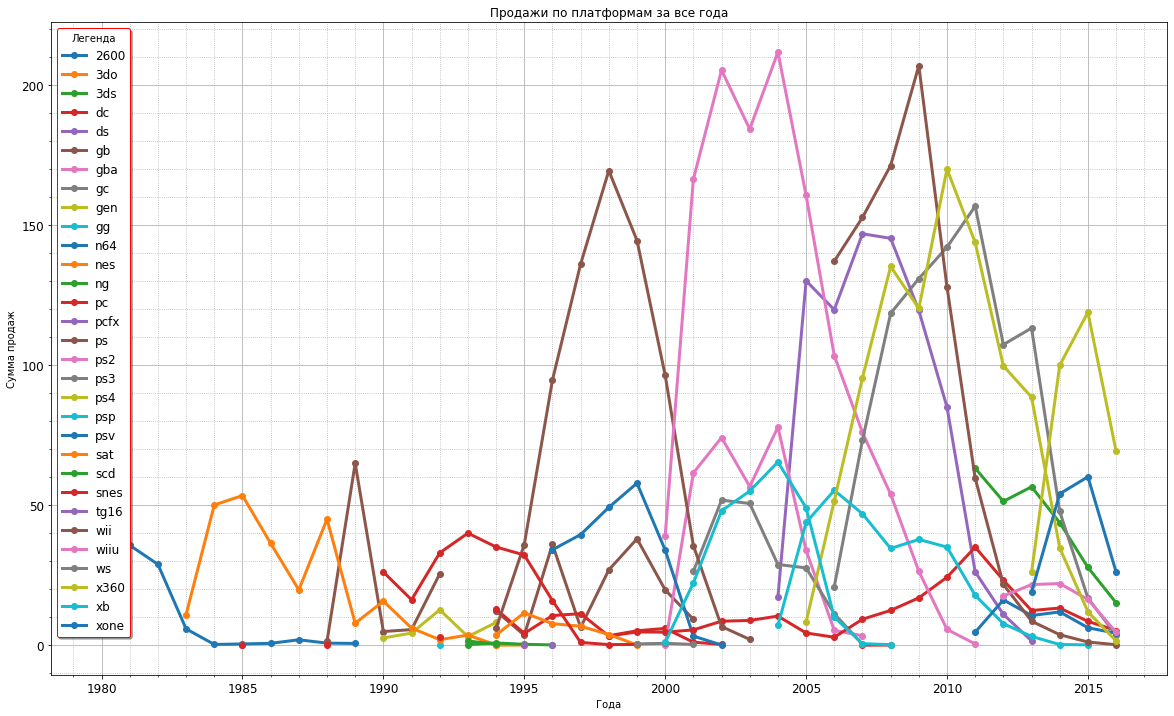

In [25]:
(df.pivot_table(index = 'year_of_release', 
             columns = 'platform', 
             values = 'sales', 
             aggfunc='sum')
.plot (kind = 'line', marker = 'o', linewidth = 3, rot=0, fontsize=12, label='', figsize = (20,12), title = 'Продажи по платформам за все года'))

plt.legend (fontsize=12, shadow=True, framealpha=1, edgecolor='red', title='Легенда')

#plt.title('Density Plot with Multiple Airlines') # не работает (?!)
plt.xlabel('Года')
plt.ylabel('Сумма продаж')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

На графике выше отображены суммарные продажи по платформам за весь изучаемый период. Видно, что у платформ есть четко прослеживаемый жизненный цикл, который варьируется в пределах 10 лет. Выберем платформы с наибольшими суммарными продажами. 

In [26]:
list_top10 = []
for top in df.sort_values(by='sales', ascending=False)['platform']:
    if len(list_top10) < 10:
        if top not in list_top10: 
            list_top10.append(top)

In [27]:
df_top10 = df.query('platform in @list_top10') 

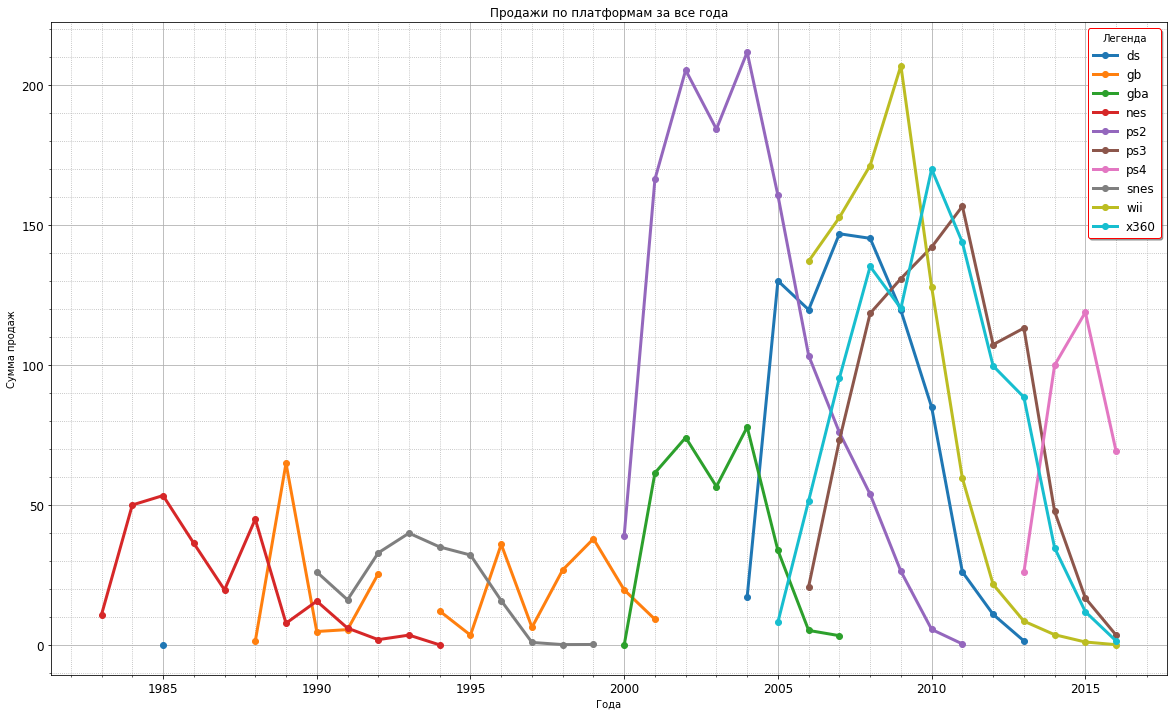

In [28]:
(df_top10.pivot_table(
              index = 'year_of_release', 
              columns = 'platform', 
              values = 'sales', 
              aggfunc='sum')
.plot (kind = 'line', marker = 'o', linewidth = 3, rot=0, fontsize=12, label='', figsize = (20,12), title = 'Продажи по платформам за все года'))

plt.legend (fontsize=12, shadow=True, framealpha=1, edgecolor='red', title='Легенда')

#plt.title('Density Plot with Multiple Airlines') # не работает (?!)
plt.xlabel('Года')
plt.ylabel('Сумма продаж')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

In [29]:
life_cycle = []
for platform in df_top10['platform'].unique():
    max = df_top10[df_top10['platform'] == platform]['year_of_release'].max()
    min = df_top10[df_top10['platform'] == platform]['year_of_release'].min()
    life_cycle.append(max-min)

In [30]:
print (life_cycle)
print (sum(life_cycle)/len(life_cycle))

[10, 11, 13, 28, 11, 10, 11, 9, 7, 3]
11.3


Средний жизненный цикл топ 10 платформ составляет 11 лет. Актуальный период для дальнейшего анализа возьмем 4 года, так как, начиная с 2012 года, выпуск компьютерных игр был примерно одинаковым без явного роста и падения.

### Анализ актуального периода

<a id='sale'></a> 

In [31]:
df_5year = df.loc[df['year_of_release'] >= 2012]

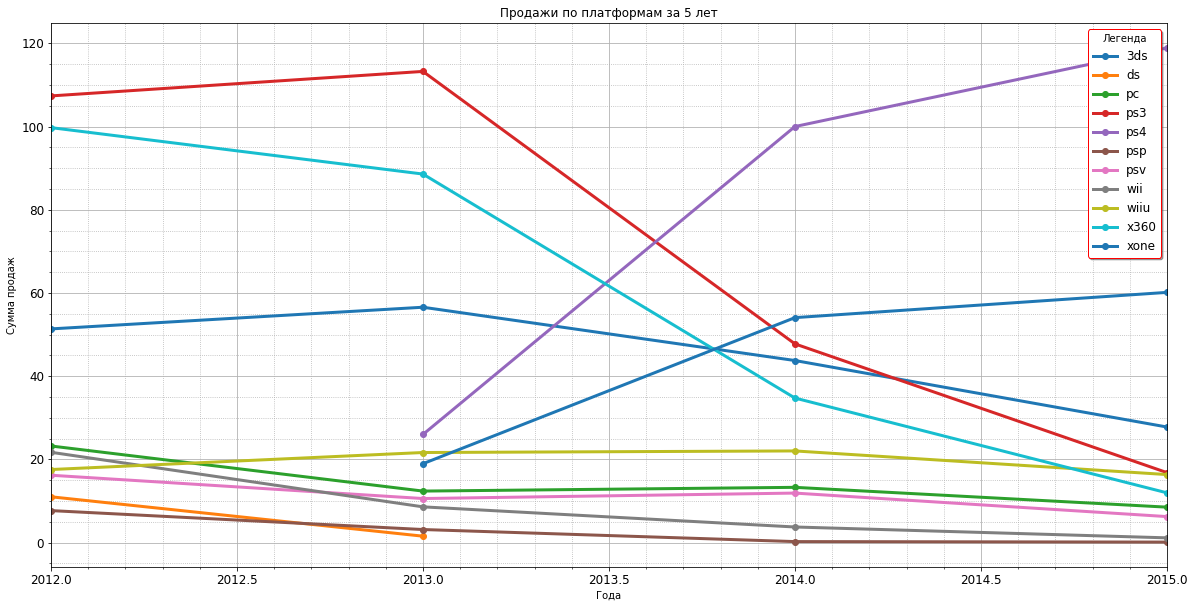

In [32]:
(df_5year.pivot_table(
             index = 'year_of_release', 
             columns = 'platform', 
             values = 'sales', 
             aggfunc='sum')
.plot (kind = 'line', marker = 'o', linewidth = 3, rot=0, fontsize=12, label='', figsize = (20,10), title = 'Продажи по платформам за 5 лет'))

plt.legend (fontsize=12, shadow=True, framealpha=1, edgecolor='red', title='Легенда')

#plt.title('Density Plot with Multiple Airlines') # не работает (?!)
plt.xlabel('Года')
plt.xlim (2012,2015) #нет полных данных за 2016 год, поэтому ограничиваем период
plt.ylabel('Сумма продаж')

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

За период с 2012 по 2015 годавсе платформы, кроме `ps4` и `xone`, имеют нисходящий тренд, например, судя по графику, продажа игр на платформе `ds` закончилась в 2013 года. Доход от продаж игр на платформе `ps4` больше, чем у xone и имеет более стремительный рост. В 2015 году доход у платформы `ps4` уже был больше, чем у `ps3` (ранее не менее популярной платформе) в 2013 году. 

### Потенциально прибыльные платформы

In [33]:
display (df_5year.groupby('platform')['sales'].sum().sort_values(ascending = False).head(10))

platform
ps4     314.14
ps3     288.79
x360    236.54
3ds     194.61
xone    159.32
wiiu     82.19
pc       62.65
psv      49.18
wii      35.37
ds       12.55
Name: sales, dtype: float64

Доходы первых пяти платформ за период 2012 - 2015 года и начало 2016 года заметно отличаются от других платформ, попавших в этот период. Будем считать данные платформы потенциально прибыльными. 

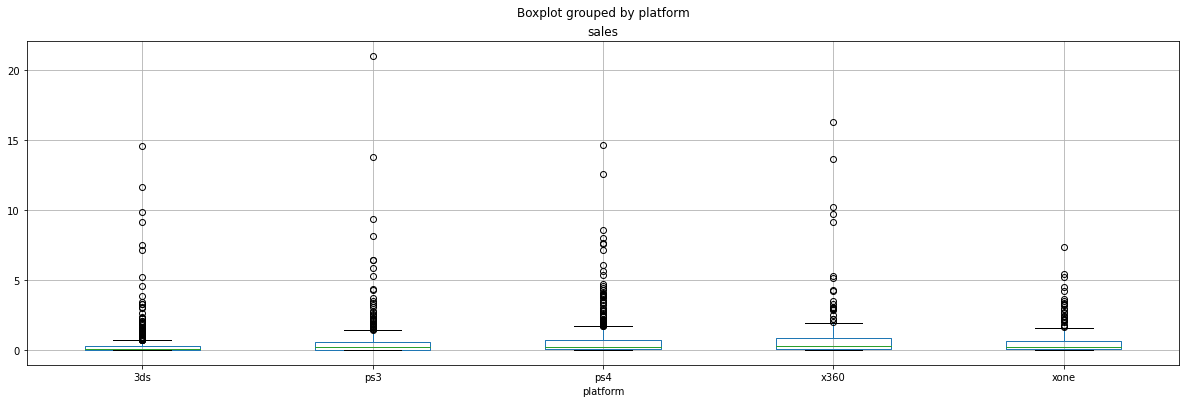

In [34]:
df_5year_top = (df_5year [df_5year ['platform']
                          .isin (df_5year.groupby('platform')['sales'].sum()
                          .sort_values(ascending = False).head().index.values)]) # топ 5 по продажам
df_5year_top.boxplot('sales', by = 'platform', figsize = (20, 6));

In [35]:
display (df_5year_top[df_5year_top['sales'] > 5].groupby('name')['sales'].sum().sort_values(ascending = False).head(10))

name
grand theft auto v                           55.41
call of duty: black ops ii                   27.47
call of duty: black ops 3                    22.02
call of duty: ghosts                         19.60
pokemon x/pokemon y                          14.60
minecraft                                    14.45
fifa soccer 13                               13.33
call of duty: advanced warfare               12.92
assassin's creed iii                         11.73
pokemon omega ruby/pokemon alpha sapphire    11.68
Name: sales, dtype: float64

In [36]:
display (df_5year_top[df_5year_top['sales'] > 5].sort_values(by = ['sales'], ascending = False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,m,13.79


На диаграмме размаха мы можем увидеть выбросы, характерные для каждой платформы - это блокбастеры игровой индустрии. В суммарных продажах по всем платформам за период 2012-2016 - это `grand theft auto v`, `call of duty: black ops ii`, `call of duty: black ops 3`. Ограничим вывод данных, чтобы более наглядно оценить. 

In [38]:
display (df_5year.groupby('platform')['sales'].sum().sort_values(ascending = False).head())

platform
ps4     314.14
ps3     288.79
x360    236.54
3ds     194.61
xone    159.32
Name: sales, dtype: float64

In [39]:
display (df_5year.groupby('platform')['sales'].median().sort_values(ascending = False).head(7))

platform
x360    0.31
wiiu    0.22
xone    0.22
ps4     0.20
ps3     0.20
wii     0.18
3ds     0.11
Name: sales, dtype: float64

(0.0, 2.0)

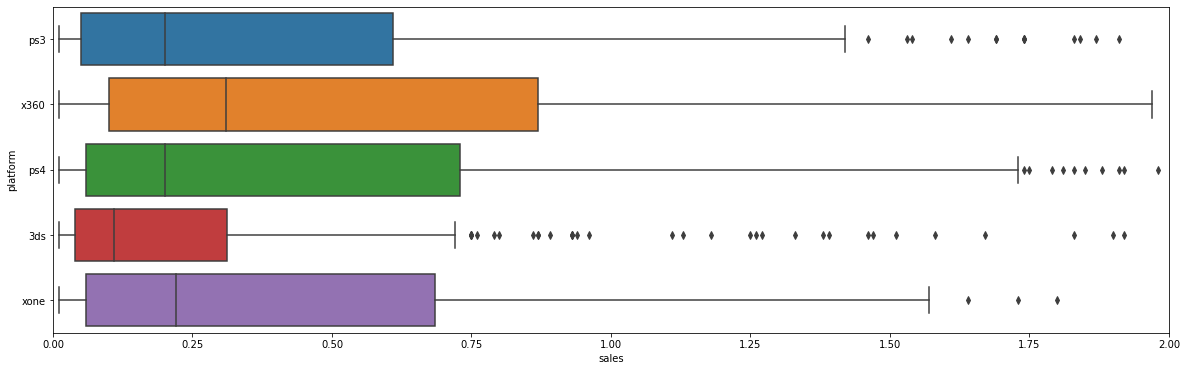

In [40]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='sales', y='platform', data=df_5year_top, orient="h")
plt.xlim(0, 2)

Если коробка (межквартильный размах) маленькая и было много выбросов - это значит, что означает, что продажи основные складывались за счет хитов, популярных игр. Большая коробка свидетельствует о том, что основные продажи происходили за счет разных игр, не только за счет блокбастеров.

Все платформы имеют смещение вправо, т.е. продажи свыше медианного значения больше разнятся и удаляются от медианного в правую (большую) сторону.  
Платформа `3ds` имеет меньше всего значений, попадающие в межквартильный размах, больше значений, которые являются выбросами. Остальные платформы имеют примерно одинанаковые размахи.

Платформа `x360` имеет наибольшую медиану и межквартильный размах, платформа находится на 3 месте в топе по суммарным продажам - это означает, что платформа более предсказуема по доходам, чем, например, `ps3`, занимающее второе место в топе. Также можно сказать, что на платформах  `ps4` (314.14) и `ps3` (288.79) игры могут получить неожиданно больший доход, чем на других платформах. 

### Влияния отзывов пользователей и критиков

<AxesSubplot:>

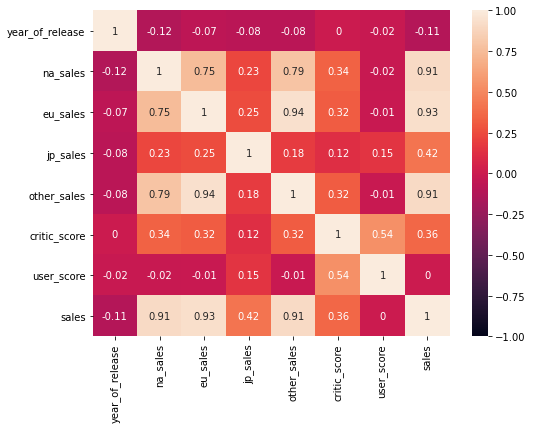

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_5year_top.corr().round(2), vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='user_score', ylabel='sales'>

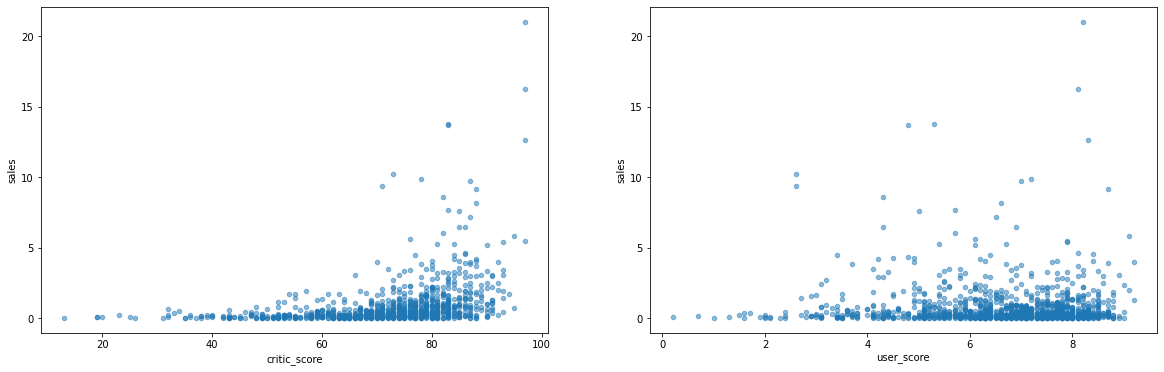

In [44]:
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
(df_5year_top
 .loc[~df_5year_top['critic_score'].isna()]
 .plot(kind = 'scatter', y='sales' , x= 'critic_score', marker = 'o', alpha = 0.5, ax=ax_1)) 
(df_5year_top
 .loc[~df_5year_top['user_score'].isna()]
 .plot(kind = 'scatter', y='sales' , x= 'user_score', marker = 'o', alpha = 0.5, ax=ax_2)) 

Продажи в Европе, Америке, Японии и в целом не зависят от оценок пользователей - это можно увидеть на диаграмме рассеивания: были высокие продажи и при низких пользовательских рейтингах. Также в таблице с попарной корреляцией корреляция между продажами и оценками пользователей варьируется около 0, кроме Японии, у нее 0.15, что также мало для подтверждения связи между этими значениями.  

Продажи от <a id='score'>  рейтингов критиков  </a> имеют выраженную зависимость. Из таблицы видно, что корреляция составляет около 30%, кроме Японии - 15%. Зависимость прямая, слабая, но значительно больше, чем у пользовательских рейтингов. На диаграмме рассеивания такая зависимость более наглядная: видно, что игры, которые имеют высокий рейтинг критиков, также имеют высокие продажи. 

In [45]:
(df_5year_top
 .loc[(~df_5year_top['user_score'].isna()) & (df_5year_top['platform'] == 'ps4')]
 .corr())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.268597,-0.197550,-0.130492,-0.239292,-0.019983,0.152447,-0.241389
na_sales,-0.268597,1.000000,0.717128,0.534556,0.916074,0.414241,-0.020933,0.894790
eu_sales,-0.197550,0.717128,1.000000,0.523301,0.935533,0.346044,-0.048925,0.951925
jp_sales,-0.130492,0.534556,0.523301,1.000000,0.570450,0.322057,0.171332,0.595710
other_sales,-0.239292,0.916074,0.935533,0.570450,1.000000,0.408465,-0.035639,0.997817
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
sales,-0.241389,0.894790,0.951925,0.595710,0.997817,0.405895,-0.031957,1.000000


<AxesSubplot:xlabel='user_score', ylabel='sales'>

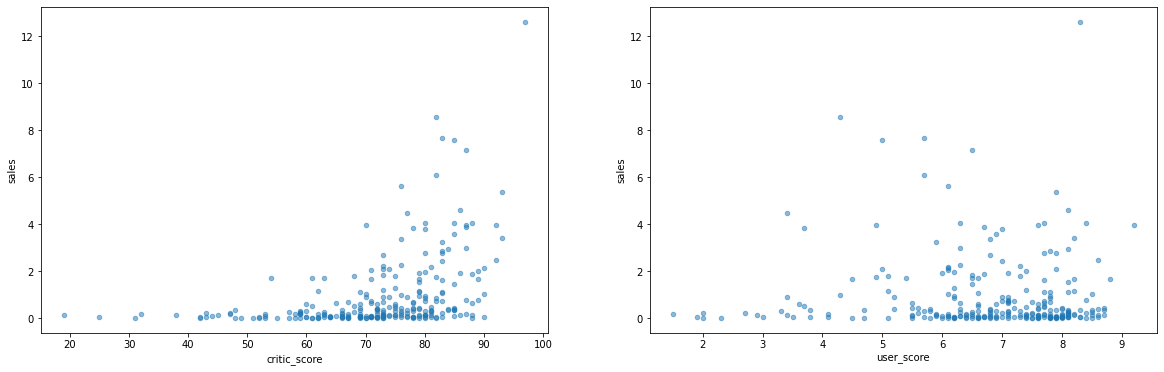

In [46]:
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
(df_5year_top
 .loc[(~df_5year_top['critic_score'].isna()) & (df_5year_top['platform'] == 'ps4')]
 .plot(kind = 'scatter', y='sales' , x= 'critic_score', marker = 'o', alpha = 0.5, ax=ax_1)) 
(df_5year_top
 .loc[(~df_5year_top['user_score'].isna()) & (df_5year_top['platform'] == 'ps4')]
 .plot(kind = 'scatter', y='sales' , x= 'user_score', marker = 'o', alpha = 0.5, ax=ax_2)) 

Для самой прибыльной платформе за 5 лет соответствуют такие же диаграммы рассеивания оценок критиков и пользователей и вывод, что продажи игр в большинстве случаев зависят от оценок критиков и в очень малой доли зависят от оценок пользователей.

### Распределение игр по жанрам

In [47]:
genre_sales = df_5year_top.pivot_table(index = 'genre', 
             values = 'sales', 
             aggfunc='sum').sort_values(by = 'sales', ascending=False)
genre_sales

,sales
genre,
action,376.25
shooter,282.11
sports,167.81
role-playing,151.26
misc,48.78
racing,42.18
fighting,35.53
platform,34.13
simulation,25.16


In [48]:
genre_count = df_5year_top.pivot_table(index = 'genre', 
             values = 'sales', 
             aggfunc='count').sort_values(by = 'sales', ascending=False)
genre_count

,sales
genre,
action,657
role-playing,219
sports,203
shooter,180
adventure,133
misc,116
fighting,83
racing,82
platform,53


Самые продаваемые жанры - это `action` (376.25), `shooter` (282.11), `sports` (167.81),  `role-playing` (151.26), далее идет большой разрыв в продажах, а именно `misc` (48.78) и `racing` (42.18). 
При этом если посмотреть на количество выпускаемых игр, то можно увидеть, что в топ 5 входят жанр `adventure`: `action` (657), `role-playing` (219), `sports` (203), `shooter` (180), `adventure` (133). У последнего всего 22.68 млн продаж за 5 лет. Можно сделать вывод, что пользователей больше привлекают игры без сложного сюжета или в которых нет сюжета: нет начала или конца.    

## Портрет пользователя для каждого региона 

Построим гистограммы для платформ и жанров по разным регионам. 

### Самые популярные платформы

<a id='platform'></a> 

In [49]:
def platform_f (columns): 
    platform_data = (df_5year.groupby('platform')[columns]
    .sum().sort_values(ascending = False).head()) 
    return platform_data   

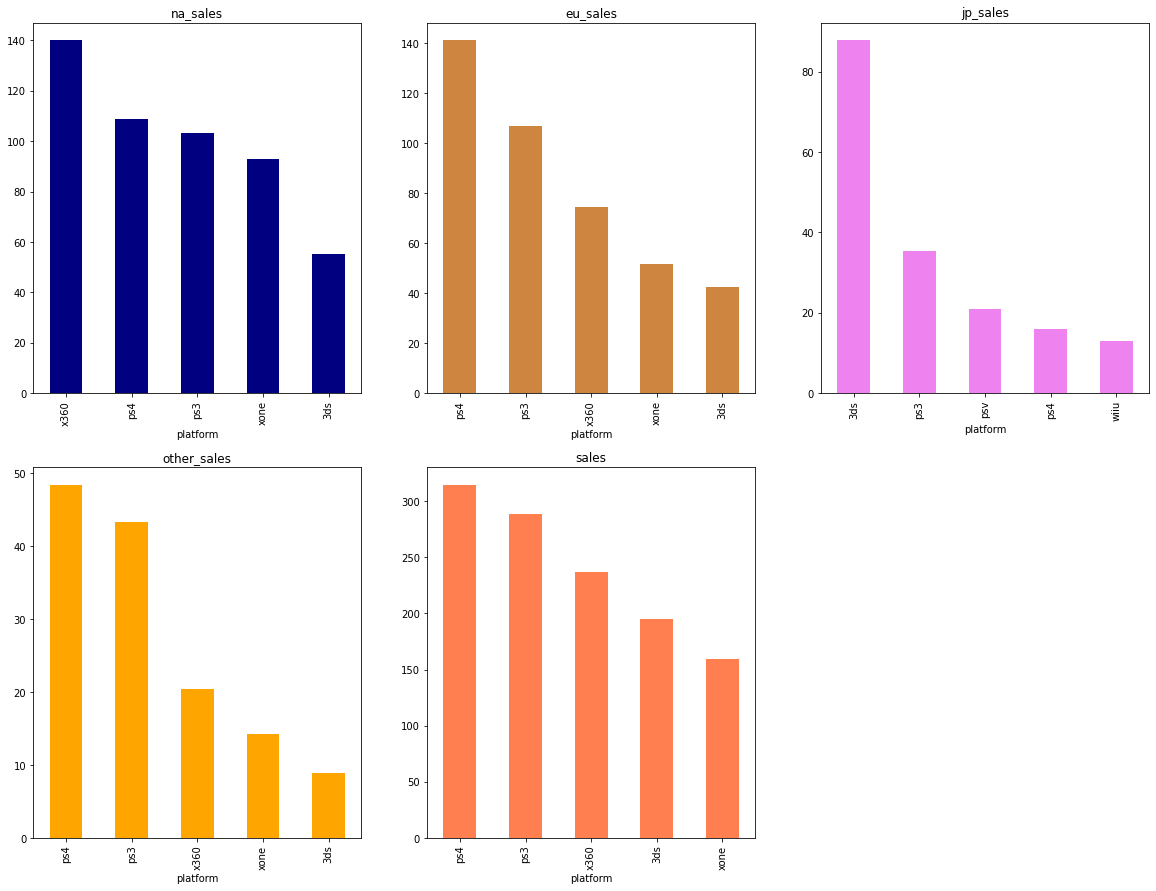

In [50]:
fig = plt.figure(figsize=(20, 15))

for sale in list_sale:
    color = ['navy', 'peru', 'violet', 'orange', 'coral']
    ax = fig.add_subplot (2, 3, list_sale.index(sale)+1)
    ax = platform_f(sale).plot (kind = 'bar', title = sale, color = color[list_sale.index(sale)])

Для разных рынков характерны одинаковые платформы одинаковые платформы, кроме японского рынка, на нем представлены не характерные для остальных регионов платформы `psv`, `wiiu`. Также в Америке популярна больше платформа `x360`, а в Европе и других регионах `ps4`.   

### Самые популярные жанры

<a id='genre'></a> 

In [51]:
def genre_f (columns): 
    genre_data = (df_5year.groupby('genre')[columns]
    .sum().sort_values(ascending = False).head()) 
    return genre_data    

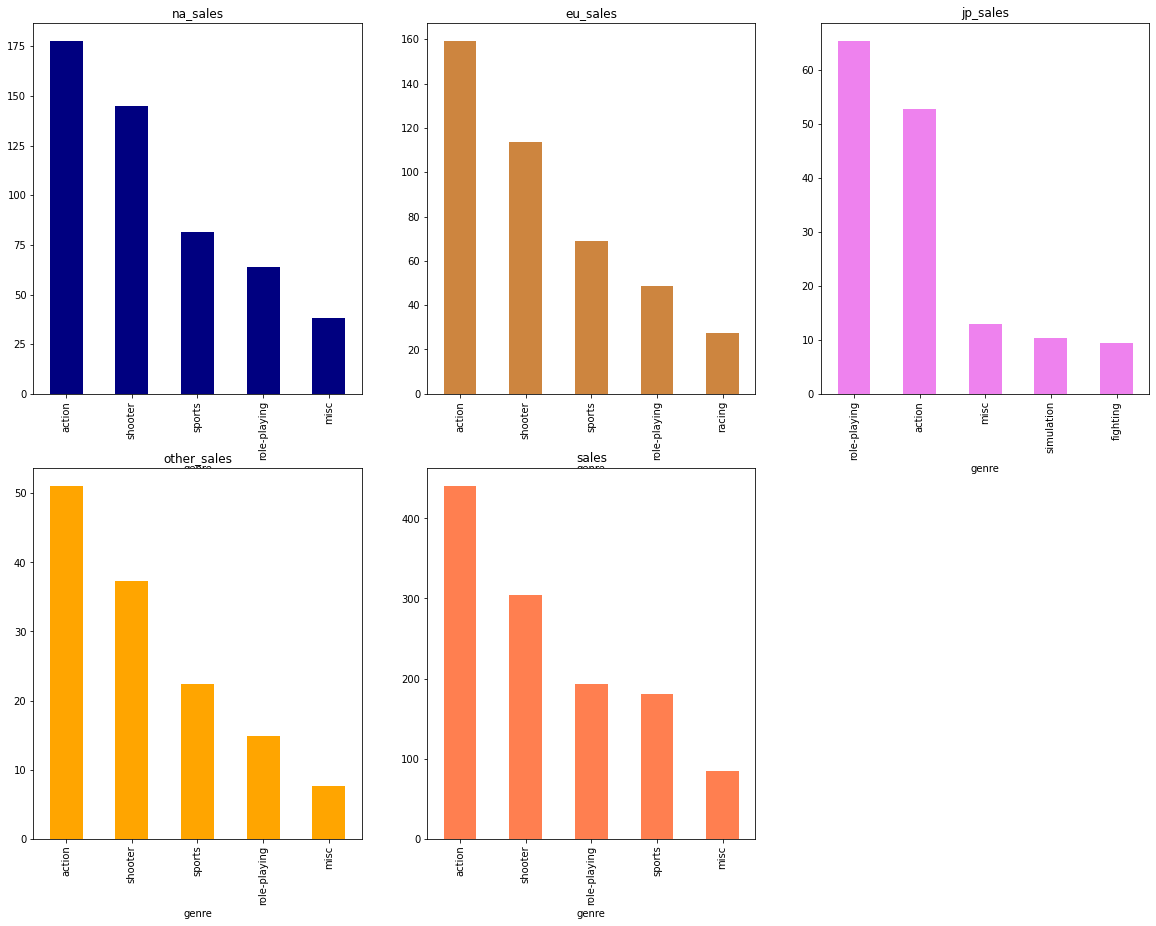

In [52]:
fig = plt.figure(figsize=(20, 15))

for sale in list_sale:
    color = ['navy', 'peru', 'violet', 'orange', 'coral']
    ax = fig.add_subplot (2, 3, list_sale.index(sale)+1)
    ax = genre_f(sale).plot (kind = 'bar', title = sale, color = color[list_sale.index(sale)])

Жанр `action` развит во всех регионах, даже в Японии. Японский рынок, как в случае и с платформами, имеет ряд особенностей, например, самый популярный жанр – это `role-playing`, а жанра `simulation` и `fighting` не характерны для других рынков. Также жанры `shooter` и `sports` находятся в топах на всех рынках, кроме японского.   

### Влияние ESRB рейтинга на регионы

In [53]:
df_portrait = df_orignal.copy() #база до замены tbd на np.Nan
df_portrait['sales'] = df_portrait[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#df_portrait['rating'] = df_portrait['rating'].fillna('tbd') #заменим пропущенные значения, чтобы они тоже участвовали в анализе 

In [54]:
df_portrait['rating'] = df_portrait['rating'].fillna('tbd') #заменим пропущенные значения, чтобы они тоже участвовали в анализе 

In [55]:
def rating_f (columns): 
    rating_data = (df_portrait.groupby('rating')[columns]
    .sum().sort_values(ascending = False).head()) 
    return rating_data  

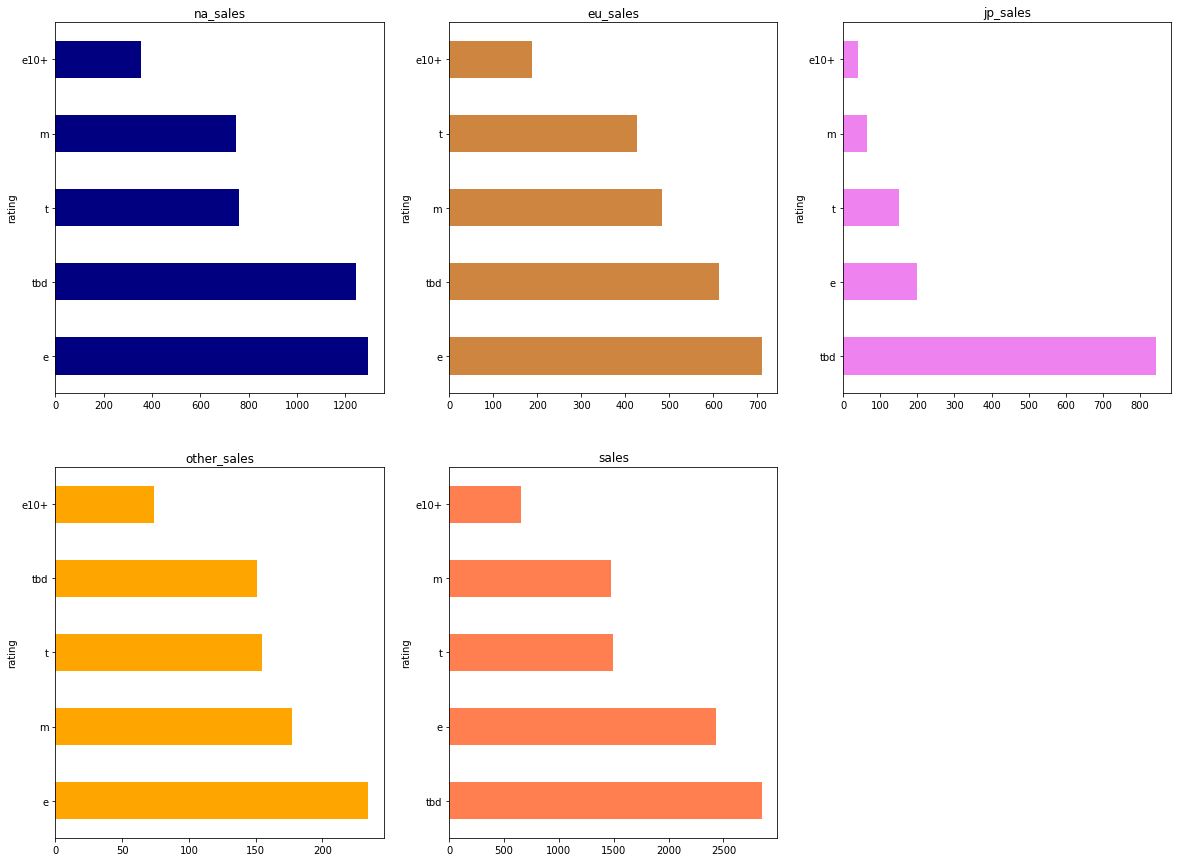

In [56]:
fig = plt.figure(figsize=(20, 15))

for sale in list_sale:
    color = ['navy', 'peru', 'violet', 'orange', 'coral']
    ax = fig.add_subplot (2, 3, list_sale.index(sale)+1)
    ax = rating_f(sale).plot (kind = 'barh', title = sale, color = color[list_sale.index(sale)])

Расшифровка рейтинга <a id='ESRB'>ESRB</a>: 

'e' «E» («Everyone») — «Для всех» 

'm' («Mature») — «От 17 лет»

't' («Teen») — «Подросткам 13—19 лет»

'e10+' («Everyone 10 and older») — «Для всех старше 10 лет»

'tbd' - рейтинг не опредлен

Для мирового рынка не важен рейтинг игры. Рейтинг "Для всех" и "Не определено" в топе во всех трех выделенных рынках. Для рынка "Другие" на продаже больше влиял рейтинг "Для всех" и второе место у рейтинга "От 17 лет".

Регионы Америка, Европа и другие похожи между собой, имеют похожие топовые платформы и жанры. Японский рынок значительно отличается от других рынков, на нем присутствуют иные платформы и популярные, не свойственные для Европы и Америки, жанры. Рейтинг также для этих регионов по продажам отличается. 

## Проверка гипотез

**Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Гипотеза **двухсторонняя**. 

In [57]:
xone = df_5year.loc[(df_5year['platform'] == 'xone') & (~df_5year['user_score'].isna())]    
pc = df_5year.loc[(df_5year['platform'] == 'pc') & (~df_5year['user_score'].isna())]    

alpha = 0.01

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score']) # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно, можно предположить, что средние пользовательских рейтингов платформ Xbox One и PC одинаковые.

In [58]:
#проверка
print ('Средний пользовательский рейтинг для платформы Xbox One:', df_5year[df_5year['platform'] == 'xone']['user_score'].mean().round(2))
print ('Средний пользовательский рейтинг для платформы PC:', df_5year[df_5year['platform'] == 'pc']['user_score'].mean().round(2))

Средний пользовательский рейтинг для платформы Xbox One: 6.52
Средний пользовательский рейтинг для платформы PC: 6.43


**Нулевая гипотеза**: cредние пользовательские рейтинги жанров Action и Sports одинаковые;

**Альтернативная гипотеза**: cредние пользовательские рейтинги жанров Action и Sports различаются.

Гипотеза **двухсторонняя**. 

In [59]:
action = df_5year.loc[(df_5year['genre'] == 'action') & (~df_5year['user_score'].isna())]    
sports = df_5year.loc[(df_5year['genre'] == 'sports') & (~df_5year['user_score'].isna())]    

alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score']) # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, следовательно, можно предположить, что что средние пользовательских рейтингов жанров Action и Sports различаются.

In [60]:
#проверка
print ('Средний пользовательский рейтинг для платформы Action:', df_5year[df_5year['genre'] == 'action']['user_score'].mean().round(2))
print ('Средний пользовательский рейтинг для платформы Sports:', df_5year[df_5year['genre'] == 'sports']['user_score'].mean().round(2))

Средний пользовательский рейтинг для платформы Action: 6.83
Средний пользовательский рейтинг для платформы Sports: 5.46


## Вывод

На продажи компьютерных игр влияют много факторов. Платформы имеют свой жизненный цикл, который составляет примерно 7-10 лет, не стоит покупать для продажи игры, на платформах, которые идут уже на спад по продажам. Так на интервале 2012 - 2015 года, платформы [ps4 и xone](#sale) недавно появились на рынке и растут по продажам и популярности. Также на продажи влияют [оценки критиков](#score), если рейтинг уже известен, и он меньше 60-70, то не стоит приобретать данную игру для продажи.

Нужно обращать внимание, какие платформы в конкретном регионе популярны, какие жанры игр востребованы. На всех рынках присутствуют все популярные платформы, но популярны они в разной степени - это нужно учитывать при продажах на определенный регион, так в Америке больше  [популярна платформа](#platform) `x360` в Европе - `ps4`, а в Японии - `3ds`. Также нужно учитывать жанр игры, так как для Японии и других регионов характерны [разные жанры](#genre). 

**На данный момент можно обратить внимание на платформы `ps4` и `xone` в регионах Америка и Европа, выбрав жанры как `action` и `shooter` с неопределенным рейтингом или [«для всех»](#ESRB).**   
